In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys

In [4]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sys.path.append("../../../Scripts/")

In [6]:
import utils as gb_utils
import adversarial as adv

ModuleNotFoundError: No module named 'utils'

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

In [7]:
# this is the setting for plots for research paper and articles.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
plt.rc('mathtext',**{'default':'regular'})

# Set the style for seaborn 
plt.style.use(['seaborn-white', 'seaborn-paper'])

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize': 'medium',
         'xtick.labelsize': 'small',
         'ytick.labelsize': 'small'
         }

pylab.rcParams.update(**params)

import seaborn as sns
sns.set_context(rc=params)

def stylize_axes(ax, title):
    # removes the top and right lines from the plot rectangle
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_tick_params(top=False, direction='out', width=1)
    ax.yaxis.set_tick_params(right=False, direction='out', width=1)
    
    # Enforce the size of the title, label and tick labels
    #ax.set_xlabel(ax.get_xlabel(), fontsize='medium')
    #ax.set_ylabel(ax.get_ylabel(), fontsize='medium')
    
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium')
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize='medium')
    #ax.set_title(title)
    
def save_image(fig, path):
    fig.tight_layout()
    fig.savefig(path+".png", dpi=300, bbox_inches='tight', transparent=True)
    fig.savefig(path+".pdf", bbox_inches='tight')

def figure_size(fig, size):
    fig.set_size_inches(size)
    fig.tight_layout()

In [8]:
sns.set(font_scale=1.3, style="whitegrid")

In [9]:
# Dataset pie plot. 
# load the datasets

uci_label_dict = {
    0:'Walking',
    1:'Walking up',
    2:'Walking Down',
    3:'Sitting',
    4:'Standing',
    5:'Lying Down'
}

mh_label_dict = {
    0:'Standing',
    1:'Sitting',
    2:'Lying Down',
    3:'Walking',
    4:'Climbing Stairs',
    5:'Waist Bend Forward',
    6:'Frontal Elevation Arms',
    7:'Knees Bending',
    8:'Cycling',
    9:'Jogging',
    10:'Running',
    11:'Jump Front & Back'
}

adl_behaviour_label_dict = {
    0:'Desk Work',
    1:'Eating/Drinking',
    2:'Housework',
    3:'Meal preparation',
    4:'Movement',
    5:'Personal Grooming',
    6:'Shopping',
    7:'Socializing',
    8:'Transportation',
    9:'Sport',
    10:'Relaxing',
    11:'Take Medication',
    12:'Sleeping'
}

adl_activity_label_dictionary = {
    0:"Climbing (down)",
    1:"Climbing (up)",
    2:"Running",
    3:"Sitting",
    4:"Standing",
    5:"Walking"
}

# Plot the dataset distribution

In [10]:
f = open("../Processed data/uci_body_acc_dataset.pickle", "rb")
_, uci_y = pickle.load(f)
f.close()

f = open("../Processed data/mHealth_chest_dataset.pickle", "rb")
_, mh_y = pickle.load(f)
f.close()

f = open("../Processed data/adl_posture_dataset.pickle", "rb")
_, adl_y = pickle.load(f)
f.close()


In [11]:
def func(pct, all_values):
    return "{:.1f}%".format(pct)

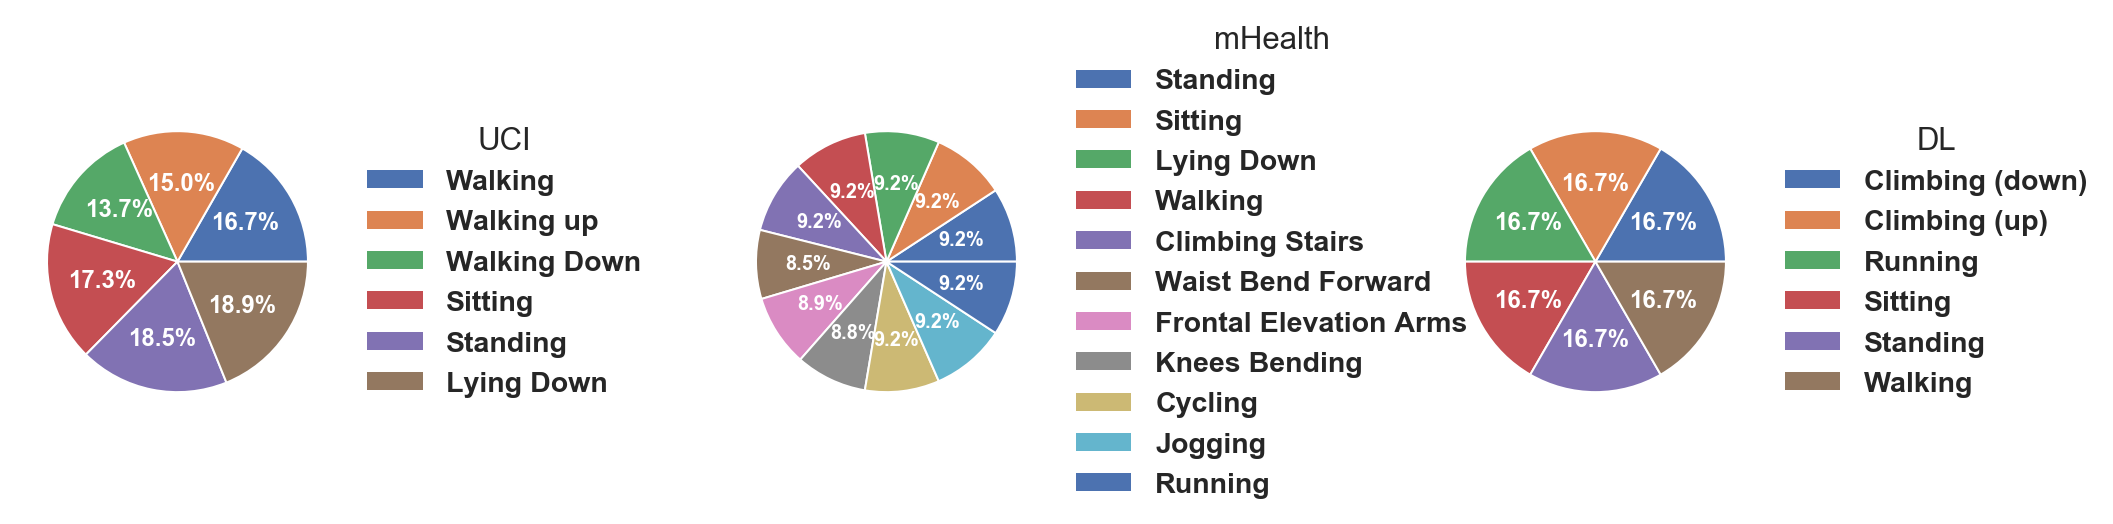

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3), subplot_kw=dict(aspect='equal'))

labels, counts = np.unique(uci_y, return_counts=True)
wedges, texts, autotexts = axes[0].pie(counts, autopct=lambda pct: func(pct, counts), textprops=dict(color='w'))
axes[0].legend(wedges, uci_label_dict.values(), title='UCI', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
               fontsize='small', prop=dict(weight='bold'))
plt.setp(autotexts, size=12, weight="bold")

labels, counts = np.unique(mh_y, return_counts=True)
wedges, texts, autotexts = axes[1].pie(counts, autopct=lambda pct: func(pct, counts), textprops=dict(color='w'))
axes[1].legend(wedges, mh_label_dict.values(), title='mHealth', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
               fontsize='small', prop=dict(weight='bold'))
plt.setp(autotexts, size=10, weight="bold")

labels, counts = np.unique(adl_y, return_counts=True)
wedges, texts, autotexts = axes[2].pie(counts, autopct=lambda pct: func(pct, counts), textprops=dict(color='w'))
axes[2].legend(wedges, adl_activity_label_dictionary.values(), title='DL', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
              fontsize='small', prop=dict(weight='bold'))
plt.setp(autotexts, size=12, weight="bold")

plt.show()
save_image(fig, "../Results/images/dataset_pie_distribution")

In [15]:
os.listdir("../Processed data/")

['adl_activity_dataset_small.pickle',
 'adl_activity_dataset_small_minmax_scaled.pickle',
 'adl_activity_data_complete.pickle',
 'adl_activity_feature_dataset_small.pickle',
 'adl_dataset_small_minmax_scaled_feature.pickle',
 'adl_posture_dataset.pickle',
 'adl_posture_dataset_small.pickle',
 'adl_posture_data_complete.pickle',
 'adl_posture_feature_dataset.pickle',
 'adl_posture_feature_dataset_1.pickle',
 'DL_source_dataset.pickle',
 'mHealth_ankle_dataset.pickle',
 'mHealth_ankle_feature_dataset.pickle',
 'mHealth_chest_dataset.pickle',
 'mHealth_chest_feature_dataset.pickle',
 'mHealth_wrist_dataset.pickle',
 'mHealth_wrist_feature_dataset.pickle',
 'mHealth_wrist_feature_dataset_1.pickle',
 'mHealth_wrist_source_dataset.pickle',
 'mHealth_wrist_target_dataset.pickle',
 'uci_body_acc_dataset.pickle',
 'uci_feature_dataset.pickle',
 'uci_feature_dataset_1.pickle',
 'uci_source_dataset.pickle',
 'uci_target_dataset.pickle']

# Plot benign and adversarial samples

In [12]:
# laod the data and CNN model
f = open("../Processed data/mHealth_wrist_dataset.pickle", "rb")
x, y = pickle.load(f)
f.close()

In [13]:
x.shape, len(y)

((4991, 128, 3), 4991)

In [14]:
n_classes = max(y) + 1
np.unique(y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([460, 460, 460, 460, 460, 426, 444, 441, 460, 460, 460], dtype=int64))

In [15]:
y_hot = keras.utils.to_categorical(y, n_classes)

In [16]:
mh_wrist_cnn_model = keras.models.load_model("../Saved Model/mh_wrist_segment_model.h5py")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
mh_wrist_cnn_model.evaluate(x, y_hot)

4991/4991 [==============================] - 0s 77us/sample - loss: 0.0418 - acc: 0.9902


[0.04177593776304592, 0.99018234]

In [18]:
keras.backend.set_learning_phase(0)

In [19]:
target_class = 3
y_target = np.ones(y.size) * target_class
y_target_one_hot = keras.utils.to_categorical(y_target, n_classes)

In [20]:
min_value, max_value = gb_utils.find_min_max(x)
n_feature = x.shape[1]
epsilon = 0.5
n_iterations = 50
n_eps_per_iter = epsilon / n_iterations

In [21]:
min_value, max_value

(-1.0, 1.0000000000000004)

In [22]:
adversarial = adv.AdvesarialCompute(mh_wrist_cnn_model, min_value, max_value, n_iterations, epsilon)

In [23]:
biter_exm = adversarial.basic_iter_compute(x, y_hot, y_target_one_hot)

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\attacks_tf.py:27: UserWarning: attacks_tf is deprecated and will be removed on 2019-07-18 or after. Code should import functions from their new locations directly.
  warnings.warn("attacks_tf is deprecated and will be removed on 2019-07-18"
[INFO 2020-11-13 13:51:38,820 cleverhans] Constructing new graph for attack BasicIterativeMethod





Instructions for updating:
dim is deprecated, use axis instead


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x00000234D6B3D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "


In [24]:
mh_wrist_cnn_model.evaluate(biter_exm, y_target_one_hot)

4991/4991 [==============================] - 0s 60us/sample - loss: 1.2122 - acc: 0.9114


[1.212194408452655, 0.9114406]

In [25]:
adv.success_score(mh_wrist_cnn_model, biter_exm, x, y, target_class)

0.9025787965616046

In [26]:
index = np.where(np.argmax(mh_wrist_cnn_model.predict(x), axis=1) != target_class)[0]

In [27]:
index = np.where(np.argmax(mh_wrist_cnn_model.predict(biter_exm[index]), axis=1) == target_class)[0]

In [28]:
while(1):
    index = np.random.randint(0, len(biter_exm), 1)
    if (np.argmax(mh_wrist_cnn_model.predict(x[index]), axis=1) != target_class) & (np.argmax(mh_wrist_cnn_model.predict(biter_exm[index]), axis=1) == target_class):
        print(index)
        break

[1158]


In [29]:
index = index[0]

In [30]:
np.argmax(mh_wrist_cnn_model.predict(x[index:index+1,]), axis=1), np.argmax(mh_wrist_cnn_model.predict(biter_exm[index:index+1,]), axis=1)

(array([10], dtype=int64), array([3], dtype=int64))

In [31]:
x_benign = x[index, ]
y_benign = np.argmax(mh_wrist_cnn_model.predict(x_benign.reshape(1, 128, 3)), axis=1)[0]

x_adv = biter_exm[index, ]

pp = np.where(y == target_class)[0]
pp = pp[np.random.randint(0, len(pp), 1)[0], ]
x_benign_target_class = x[pp, ]


In [32]:
print(np.argmax(mh_wrist_cnn_model.predict(x_benign.reshape(1, 128, 3)), axis=1))
print(np.argmax(mh_wrist_cnn_model.predict(x_adv.reshape(1, 128, 3)), axis=1))
print(np.argmax(mh_wrist_cnn_model.predict(x_benign_target_class.reshape(1, 128, 3)), axis=1))

[10]
[3]
[3]


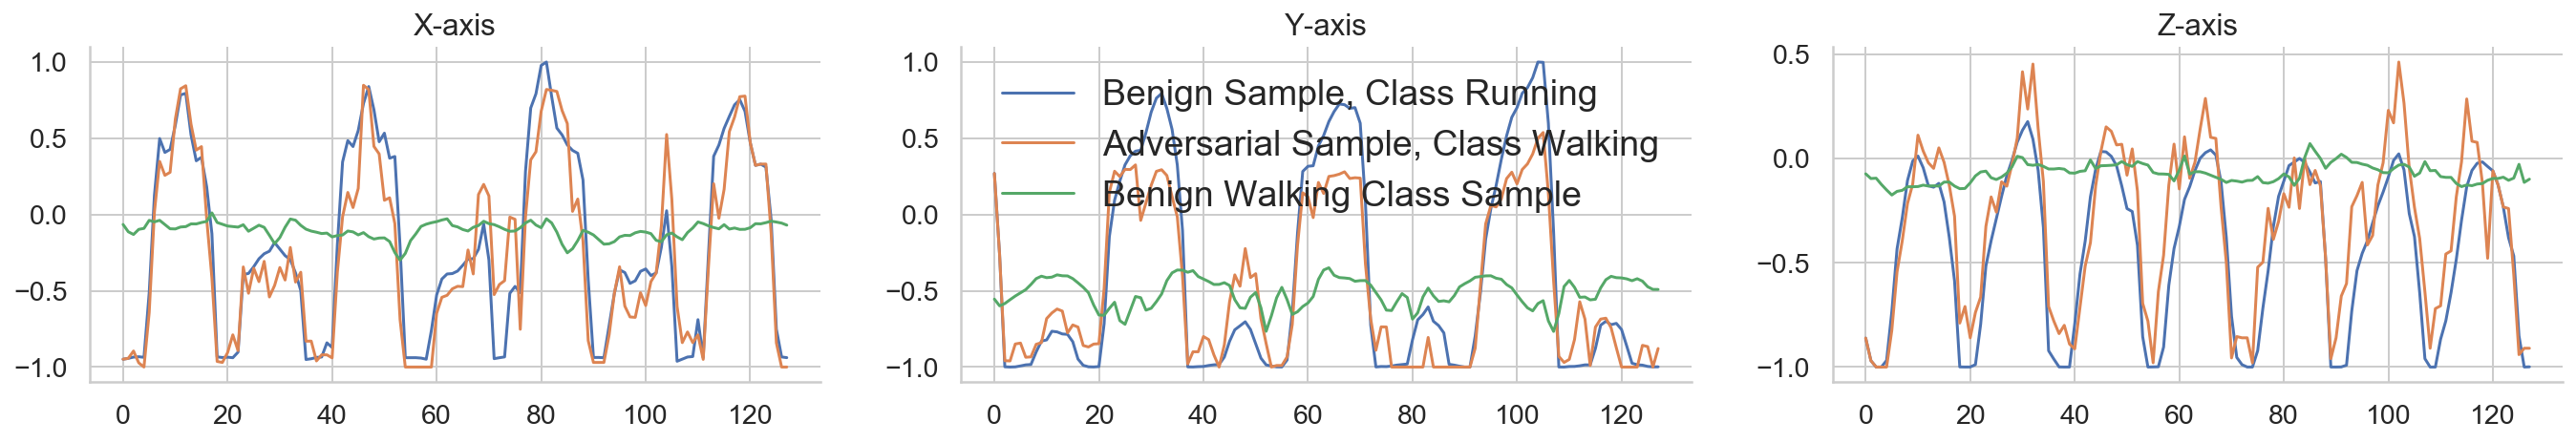

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 3.5))
for i in range(3):
    ax[i].plot(x_benign[:, i], label="Benign Sample, Class {}".format(mh_label_dict[y_benign]))
    ax[i].plot(x_adv[:, i], label="Adversarial Sample, Class {}".format(mh_label_dict[target_class]))
    ax[i].plot(x_benign_target_class[:, i], label="Benign {} Class Sample".format(mh_label_dict[target_class]))
    stylize_axes(ax[i], "")

ax[0].title.set_text('X-axis')
ax[1].legend(fontsize='large')
ax[1].title.set_text('Y-axis')
ax[2].title.set_text('Z-axis')
fig.tight_layout()
# save_image(fig, "../Results/images/benign_and_adv_sample")
plt.show()

# Plot Confusion Matrix of Results

In [11]:
result_folder = "../Results/texts/"

In [12]:
images_folder = "../Results/images/"

In [13]:
os.listdir(result_folder)

['adl_activity_segment_model_results.txt',
 'adl_posture_segment_model_results.txt',
 'dl_source_tar_results.csv',
 'dl_source_untar_results.csv',
 'dl_target_tar_results.csv',
 'dl_target_untar_results.csv',
 'dtc_tar_adv_results.csv',
 'dtc_untar_adv_results.csv',
 'knn_untar_adv_results.csv',
 'mh_ankle_segment_model_results.txt',
 'mh_ankle_source_tar_results.csv',
 'mh_ankle_source_untar_results.csv',
 'mh_ankle_target_tar_results.csv',
 'mh_ankle_target_untar_results.csv',
 'mh_chest_segment_model_results.txt',
 'mh_chest_source_tar_results.csv',
 'mh_chest_source_untar_results.csv',
 'mh_chest_target_tar_results.csv',
 'mh_chest_target_untar_results.csv',
 'mh_source_tar_results.csv',
 'mh_source_untar_results.csv',
 'mh_target_tar_results.csv',
 'mh_target_untar_results.csv',
 'mh_wrist_segment_model_results.txt',
 'mh_wrist_source_tar_results.csv',
 'mh_wrist_source_untar_results.csv',
 'mh_wrist_target_tar_results.csv',
 'mh_wrist_target_untar_results.csv',
 'trans_bet_model_

In [14]:
dataset_name = "dl_posture"

In [15]:
df_un = pd.read_csv(result_folder+"trans_bet_model_dl_posture_untargeted.csv")
df_tar = pd.read_csv(result_folder+"trans_bet_model_dl_posture_targeted.csv")

In [16]:
df_un.head()

,Unnamed: 0,Loss,Accuracy,Misclassification Rate,Success Score,Attack Method,Classifier
0,0,2.678265,28.401071,71.598929,70.649793,FGSM,SVC
1,1,2.742110,44.950110,55.049890,52.105135,BIM,SVC
2,2,3.059437,40.739839,59.260161,57.240204,MIM,SVC
3,3,0.968159,70.893161,29.106839,23.387686,SMM,SVC
4,4,0.433301,85.397907,14.602093,2.798734,CW,SVC


In [17]:
df_tar.head()

,Unnamed: 0,Accuracy,Success Score,Attack Method,Classifier
0,0,16.597712,0.087540,FGSM,SVC
1,1,16.670723,0.087540,BIM,SVC
2,2,17.060112,0.554421,MIM,SVC
3,3,16.597712,0.000000,SMM,SVC
4,4,16.597712,0.000000,CW,SVC


In [18]:
confusion_matrix_un = pd.crosstab(df_un['Classifier'], df_un['Attack Method'], 
                                  values=df_un['Success Score'], aggfunc='mean')

confusion_matrix_tar = pd.crosstab(df_tar['Classifier'], df_tar['Attack Method'], 
                                  values=df_tar['Success Score'], aggfunc='mean')

In [19]:
confusion_matrix_un

Attack Method,BIM,CW,FGSM,MIM,SMM
Classifier,,,,,
DNN,89.413483,99.975663,78.048187,88.269652,61.912874
DTC,79.922122,50.790947,82.964225,82.599173,38.817230
KNN,51.667072,4.258944,56.850815,57.897299,25.724020
LRC,54.928206,6.132879,73.132149,58.651740,31.345826
RFC,55.293259,11.973716,74.178632,58.749087,25.115600
SVC,52.105135,2.798734,70.649793,57.240204,23.387686


In [54]:
sns.set(font_scale=1.3)

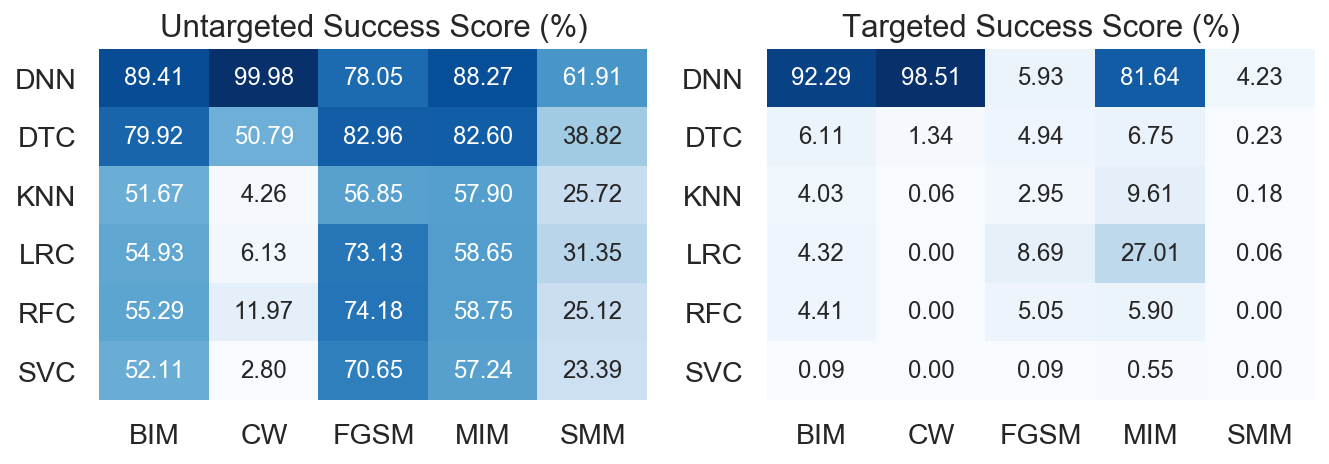

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 3))

sns.heatmap(confusion_matrix_un, annot=True, ax=ax[0], fmt=".2f", cmap='Blues',
           annot_kws={"fontsize":12}, cbar=False)
sns.heatmap(confusion_matrix_tar, annot=True, ax=ax[1], fmt=".2f", cmap='Blues',
           annot_kws={"fontsize":12}, cbar=False)

ax[0].title.set_text('Untargeted Success Score (%)')
stylize_axes(ax[0], "")
ax[0].set_xlabel("")
ax[0].set_ylabel("")

ax[1].title.set_text('Targeted Success Score (%)')
stylize_axes(ax[1], "")
ax[1].set_xlabel("")
ax[1].set_ylabel("")


figure_size(fig, (9.5, 3.5))
save_image(fig, images_folder+dataset_name+"_trans_bet_models")
plt.show()


# Plot Success Score of DTC and DNN Adversarial Examples

In [34]:
text_result_folder = "../Results/texts/"

In [37]:
os.listdir(text_result_folder)

['adl_activity_segment_model_results.txt',
 'adl_posture_segment_model_results.txt',
 'dl_source_tar_results.csv',
 'dl_source_untar_results.csv',
 'dl_target_tar_results.csv',
 'dl_target_untar_results.csv',
 'dtc_tar_adv_results.csv',
 'dtc_untar_adv_results.csv',
 'knn_untar_adv_results.csv',
 'mh_ankle_segment_model_results.txt',
 'mh_ankle_source_tar_results.csv',
 'mh_ankle_source_untar_results.csv',
 'mh_ankle_target_tar_results.csv',
 'mh_ankle_target_untar_results.csv',
 'mh_chest_segment_model_results.txt',
 'mh_chest_source_tar_results.csv',
 'mh_chest_source_untar_results.csv',
 'mh_chest_target_tar_results.csv',
 'mh_chest_target_untar_results.csv',
 'mh_source_tar_results.csv',
 'mh_source_untar_results.csv',
 'mh_target_tar_results.csv',
 'mh_target_untar_results.csv',
 'mh_wrist_segment_model_results.txt',
 'mh_wrist_source_tar_results.csv',
 'mh_wrist_source_untar_results.csv',
 'mh_wrist_target_tar_results.csv',
 'mh_wrist_target_untar_results.csv',
 'trans_bet_model_

In [38]:
dtc_untar_results = pd.read_csv(text_result_folder+"dtc_untar_adv_results.csv")
dtc_tar_results = pd.read_csv(text_result_folder+"dtc_tar_adv_results.csv")

knn_untar_results = pd.read_csv(text_result_folder+"knn_untar_adv_results.csv")

dnn_untar_results = pd.read_csv(text_result_folder+"trans_bet_model_uci_untargeted.csv")
dnn_tar_results = pd.read_csv(text_result_folder+"trans_bet_model_uci_targeted.csv")


In [45]:
dtc_untar_results

,Unnamed: 0,Model,Success Score,Accuracy,Loss,Attack Method
0,0,SVC,0.349515,7642.718447,0.553463,RBA Exact
1,1,RFC,3.961165,8217.475728,0.525953,RBA Exact
2,2,KNN,0.815534,7899.029126,1.738828,RBA Exact
3,3,DTC,42.019417,3246.601942,23.325411,RBA Exact
4,4,LRC,0.388350,7634.951456,0.575884,RBA Exact
5,5,DNN,0.349515,8178.640604,0.476019,RBA Exact
6,6,SVC,1.631068,7572.815534,0.561414,Papernot
7,7,RFC,0.854369,8384.466019,0.459679,Papernot
8,8,KNN,2.640777,7856.310680,1.702650,Papernot
9,9,DTC,28.466019,4423.300971,19.261236,Papernot


In [60]:
plot_untar_results = dnn_untar_results[dnn_untar_results['Attack Method'] == "BIM"]
plot_untar_results['Model'] = plot_untar_results['Classifier']
plot_untar_results = plot_untar_results.drop(["Misclassification Rate", "Classifier"], axis = 1)

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
plot_untar_results = plot_untar_results.append(dtc_untar_results[dtc_untar_results['Attack Method'] == 
                                                                "RBA Exact"])

In [62]:
plot_untar_results

,Unnamed: 0,Loss,Accuracy,Success Score,Attack Method,Model
1,1,4.108502,11.029126,84.776699,BIM,SVC
6,6,2.053553,9.359223,89.786408,BIM,RFC
11,11,25.491240,12.932039,86.330097,BIM,KNN
16,16,31.091605,9.980583,85.980583,BIM,DTC
21,21,15.506728,11.106796,84.116505,BIM,LRC
26,26,106.360368,8.854369,99.805825,BIM,DNN
0,0,0.553463,7642.718447,0.349515,RBA Exact,SVC
1,1,0.525953,8217.475728,3.961165,RBA Exact,RFC
2,2,1.738828,7899.029126,0.815534,RBA Exact,KNN
3,3,23.325411,3246.601942,42.019417,RBA Exact,DTC


In [63]:
plot_tar_results = dnn_tar_results[dnn_tar_results['Attack Method'] == "BIM"]
plot_tar_results['Model'] = plot_tar_results['Classifier']
plot_tar_results = plot_tar_results.drop(["Classifier"], axis = 1)

plot_tar_results = plot_tar_results.append(dtc_tar_results[dtc_tar_results['Attack Method'] 
                                                                 == "RBA Exact"])


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


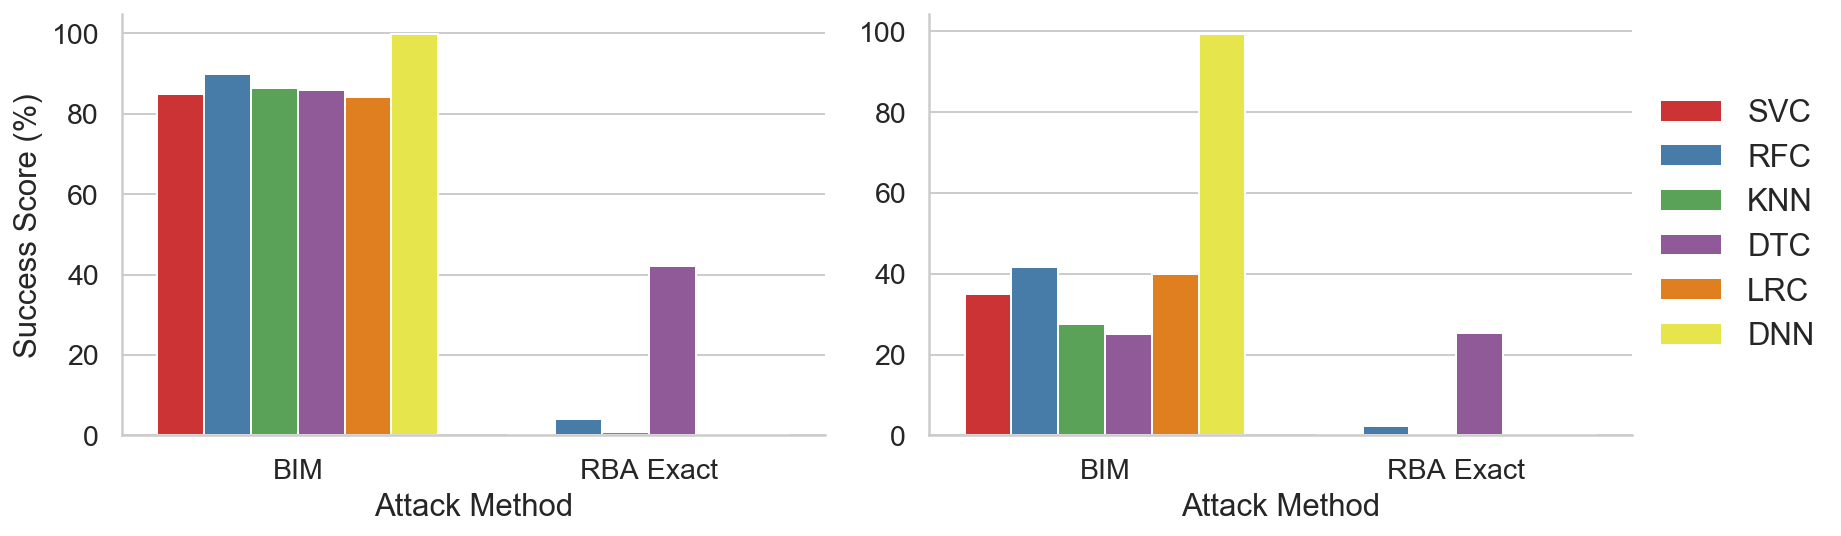

In [66]:
fig, axes = plt.subplots(1, 2)

sns.barplot(x = 'Attack Method', y = 'Success Score', hue = 'Model', 
            data = plot_untar_results, palette=("Set1"), ax = axes[0])
sns.barplot(x = 'Attack Method', y = 'Success Score', hue = 'Model', 
            data = plot_tar_results, palette=('Set1'), ax = axes[1])

figure_size(fig, (13, 4))

# Shrink current axis by 40%
box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.99, box.height])

# Put a legend to the right of the current axis
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# remove the legend from the first plot
axes[0].get_legend().remove()

axes[0].set_ylabel("Success Score (%)")
axes[1].set_ylabel("")

# stylize the axes and save the image
stylize_axes(axes[0], "Success score of untargeted examples.")
stylize_axes(axes[1], "Success score of targeted examples.")
save_image(fig, "../Results/images/dtc_dnn_adv_success_score")